In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([5, 2, 1, ..., 7, 8, 2])

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2 

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if(i % 50 == 0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[0 0 6 ... 6 6 6] [5 2 1 ... 7 8 2]
Accuracy:  0.053829268292682926
Iteration:  50
[5 1 1 ... 2 6 4] [5 2 1 ... 7 8 2]
Accuracy:  0.3454634146341463
Iteration:  100
[3 1 1 ... 7 8 4] [5 2 1 ... 7 8 2]
Accuracy:  0.4795853658536585
Iteration:  150
[5 1 1 ... 9 8 4] [5 2 1 ... 7 8 2]
Accuracy:  0.5918780487804878
Iteration:  200
[5 1 1 ... 9 8 2] [5 2 1 ... 7 8 2]
Accuracy:  0.6765121951219513
Iteration:  250
[5 1 1 ... 7 8 2] [5 2 1 ... 7 8 2]
Accuracy:  0.7320731707317073
Iteration:  300
[5 1 1 ... 7 8 2] [5 2 1 ... 7 8 2]
Accuracy:  0.7674634146341464
Iteration:  350
[5 1 1 ... 7 8 2] [5 2 1 ... 7 8 2]
Accuracy:  0.7882926829268293
Iteration:  400
[5 1 1 ... 7 8 2] [5 2 1 ... 7 8 2]
Accuracy:  0.8045609756097561
Iteration:  450
[5 1 1 ... 7 8 2] [5 2 1 ... 7 8 2]
Accuracy:  0.8167073170731707


In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


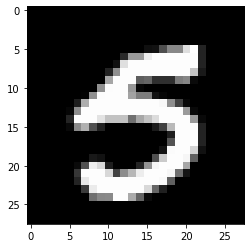

Prediction:  [1]
Label:  2


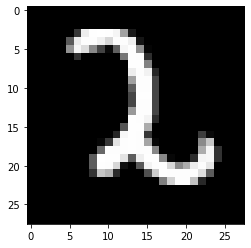

Prediction:  [6]
Label:  6


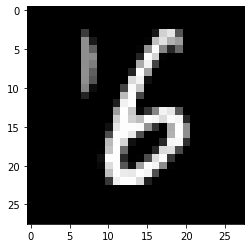

Prediction:  [9]
Label:  9


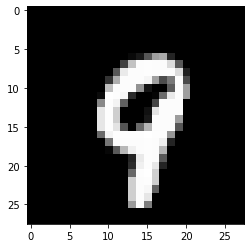

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(500, W1, b1, W2, b2)
test_prediction(300, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 4 5 6 1 3 5 9 8 2 3 6 7 4 5 4 1 0 2 3 3 5 2 3 6 6 1 9 6 7 5 2 1 9 9 8 2
 1 7 8 1 3 4 8 8 0 3 8 6 2 1 4 2 2 8 8 0 6 4 4 3 8 4 0 0 0 4 5 9 9 7 8 7 4
 5 7 1 9 3 2 9 8 9 8 8 2 1 8 9 2 8 4 1 1 0 5 9 9 6 3 1 3 4 2 3 6 1 9 8 1 4
 0 3 0 0 1 6 5 9 8 5 4 4 5 9 6 1 4 4 9 6 0 0 8 3 9 1 7 1 6 4 2 6 1 1 0 9 7
 9 8 9 7 1 0 2 2 1 0 6 1 1 2 4 6 3 9 4 4 6 9 6 6 5 9 5 4 3 3 3 1 2 3 9 9 2
 4 7 2 1 9 1 7 2 6 2 6 4 3 3 8 1 6 9 5 8 3 4 1 5 8 2 6 9 7 2 5 2 6 3 6 7 9
 3 0 1 2 4 5 9 5 5 2 4 0 4 8 6 7 7 2 2 0 1 5 0 2 4 3 3 2 8 2 6 7 7 1 8 0 4
 9 2 6 1 2 2 1 2 0 3 3 4 1 4 9 0 8 0 6 2 8 4 5 8 0 3 8 6 8 8 7 4 7 7 5 5 2
 9 6 1 6 9 1 5 3 3 0 2 0 8 2 1 1 1 2 5 4 3 1 3 3 9 6 7 6 7 3 0 1 6 4 1 3 8
 0 8 9 7 5 3 1 9 3 4 7 3 1 3 6 7 6 9 1 1 2 5 1 3 8 6 4 1 5 9 2 0 0 4 9 9 7
 0 3 1 4 6 9 4 3 3 0 5 1 7 7 4 3 6 4 1 7 6 5 2 3 3 4 9 2 4 5 0 6 2 7 7 6 4
 2 5 1 1 4 1 4 4 6 3 5 9 4 0 5 3 4 4 5 9 2 7 1 0 8 0 2 8 4 1 9 1 0 3 7 8 9
 4 6 9 1 6 9 9 4 7 2 0 9 7 7 0 3 7 2 7 4 8 8 6 6 1 0 5 6 9 7 1 5 4 6 7 2 6
 9 8 6 1 6 3 3 1 5 0 3 7 

0.835